In [1]:
import numpy as np
from numpy.random import exponential, randint
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True
import pickle


In [2]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [3]:
for key in data.keys():
    print(key,":",data[key].shape)

#Bch : (374,)
Dsb : (374,)
Dss : (374,)
d_interSp : (374,)
Vtot : (374,)
Vh : (374,)
Ln : (374,)
SA : (374,)
nPSD : (374,)
A1 : (374,)
A2 : (374,)
GPHN SNR : (374,)
DiS-EMchk : (374,)
Lneck : (374,)
maxDneck : (374,)
minDneck : (374,)
meanDneck : (374,)
Rneck : (374,)
Lhead : (374,)
maxDhead : (374,)
minDhead : (374,)
meanDhead : (374,)
Ah : (374,)
Rhead : (374,)


In [4]:
lab_Linear_dims = ['Lhead','maxDhead','minDhead','meanDhead']
lab_2d_dims = ['Ah']
lab_3d_dims = ['Vh']
shrinkage_factor = 1./1.56999

In [5]:

spdata = data.copy()
for l in lab_Linear_dims:
    spdata[l] = data[l]/shrinkage_factor**(1.0/2.0)
#for l in lab_2d_dims:
#Change this to have A1 and A2 fixed
A2f = data['A2']
A2f[isnan(A2f)] = 0.0
A1f = data['A1']
A1f[isnan(A1f)] = 0.0

Ahfree = data['Ah']-A2f-A1f
Ahfree = Ahfree/shrinkage_factor
spdata['Ah'] = Ahfree+A2f+A1f

for l in lab_3d_dims:
    spdata[l] = data[l]/shrinkage_factor**(3.0/2.0)

In [6]:
# diameter dendrite  0.7/.75**(1./2.0)

In [7]:
with open("data_Fullset/Fullset_shrnk_corrected.pkl","wb") as f:
    pickle.dump(spdata,f)

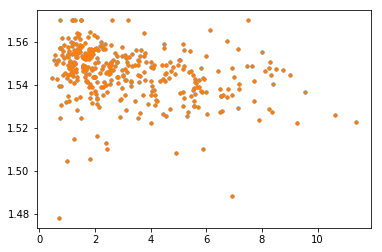

In [8]:
plot(data['Ah'],(Ahfree+A1f+A2f)/data['Ah'],'.')
plot(data['Ah'],spdata['Ah']/data['Ah'],'.')

In [9]:
rhosp = 1.3
diamneck = spdata['meanDneck'].mean()/1e3
dendareaperL = rhosp*(mean(spdata['Ah'])+(pi*diamneck))
denddiam = 0.87
factor = dendareaperL/(pi*denddiam)
print(factor)
factorsp = factor
factordd = (pi*denddiam-(pi*diamneck**2/4.0)*rhosp)/(pi*denddiam)
print(factordd,factordd+factorsp)


2.6770151793700894
0.9773400907858246 3.654355270155914


In [6]:
with open("data_Fullset/shPSD_Morphometry.pkl","rb") as f:
    datash = pickle.load(f)

In [7]:
datash

,A,Dpb,Dps
shPSD_ID,,,
180618Lmoz3_1,0.264371,21.148512,53.880635
180618Lmoz3_2,0.091982,25.985787,58.717910
180618Lmoz3_3,0.199327,29.640078,62.372200
180618Mmoz3_1-1_shPSD1,0.108019,2.700000,54.077000
180618Mmoz3_1-1_shPSD2,0.264497,3.696448,55.073448
180618Mmoz3_1-1_shPSD3,0.140767,6.122697,57.499697
180618Mmoz3_1-2_shPSDA,0.114171,10.618761,61.995761
180618Mmoz3_2-1_shPSDC,0.134315,16.223004,67.600004
180618Mmoz3_2-2_shPSDB,0.160663,18.275345,69.652345


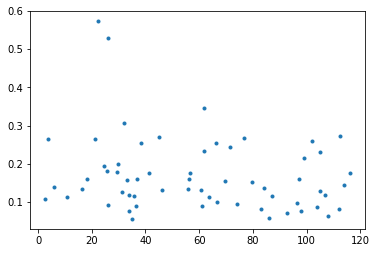

In [12]:
plot(datash['Dpb'],datash['A'],'.')

In [11]:
arange(61)[datash['Dps']>160]

array([21])